# SVM
- 선형모델을 개선한 모델
- 학습 샘플수가 적을 때 유용

<img src="https://github.com/StillWork/image/blob/main/%E1%84%89%E1%85%B3%E1%84%8F%E1%85%B3%E1%84%85%E1%85%B5%E1%86%AB%E1%84%89%E1%85%A3%E1%86%BA%202021-05-30%20%E1%84%8B%E1%85%A9%E1%84%8C%E1%85%A5%E1%86%AB%209.28.37.png?raw=1" align='left'  width=500>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

In [2]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report, roc_curve, auc
from sklearn.linear_model import SGDClassifier, LinearRegression
from sklearn.svm import SVC, SVR

## 데이터 다운로드
- 남여 키, 몸무게 데이터

In [3]:
data = pd.read_csv("https://github.com/data-labs/data/raw/main/weight-height.csv")
print(data.shape)
data[:5]

(10000, 3)


,Gender,Height,Weight
0,Male,73.847017,241.893563
1,Male,68.781904,162.310473
2,Male,74.110105,212.740856
3,Male,71.730978,220.042470
4,Male,69.881796,206.349801


In [4]:
# 성별 인코딩, 단위 변환 (인치, 파운드 --> cm, kg)
data.Gender = data.Gender.map({'Male':0, 'Female':1})
data.Height = data.Height*2.54 # cm
data.Weight = data.Weight*0.453592 # kg
data[:5]

,Gender,Height,Weight
0,0,187.571423,109.720985
1,0,174.706036,73.622732
2,0,188.239668,96.497550
3,0,182.196685,99.809504
4,0,177.499761,93.598619


In [5]:
# 사본 사용 (원본 백업)
df = data.copy()

##  성별  분류
- X: 키와 몸무게 (2개의 특성을 사용)
- y: 성별 (남여를 구분하는 이진 분류 문제)

In [6]:
X = df[["Height", "Weight"]]
y = df.Gender

In [7]:
X_train, X_test, y_train, y_test = train_test_split(X, y)

### 선형 분류

In [8]:
model = SGDClassifier() # (1) 모델 생성
model.fit(X_train, y_train) # (2) 훈련
model.score(X_test, y_test) # (3) 평가 (정확도)

0.8896

(130.0, 210.0)

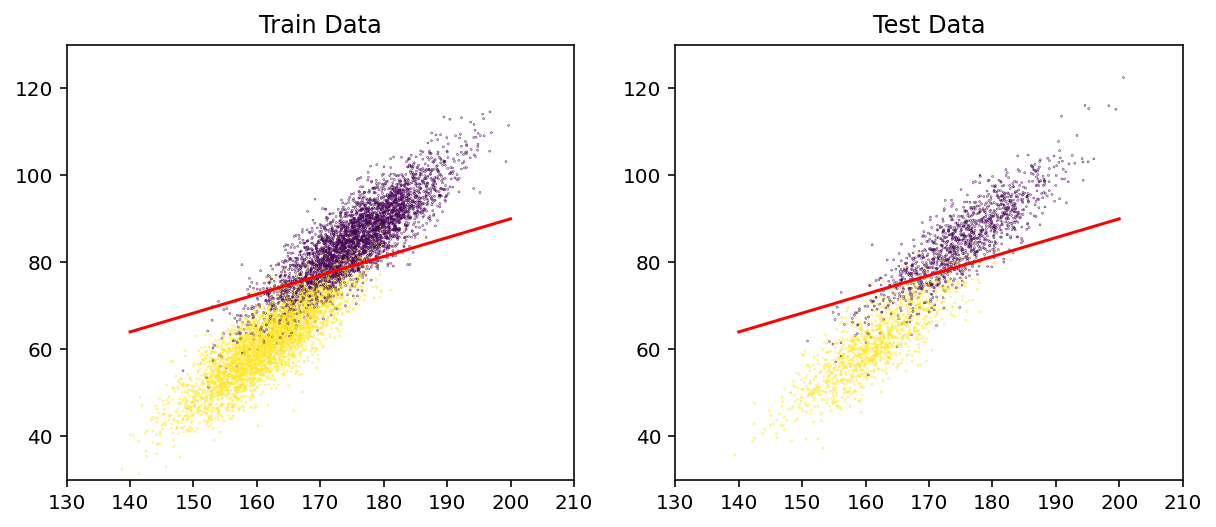

In [9]:
a1, a2 = model.coef_[0][0], model.coef_[0][1]
b = model.intercept_

plt.figure(figsize=(10,4))

xs = np.linspace(140,200,2)
ys = -(a1/a2)*xs - b/a2

plt.subplot(1,2,1)  
plt.title('Train Data')
plt.plot(xs,ys, c='r')
plt.scatter(X_train.Height,X_train.Weight, c=y_train, s=0.05)
plt.ylim([30,130])
plt.xlim([130,210])

plt.subplot(1,2,2)  
plt.title('Test Data')
plt.plot(xs,ys, c='r')
plt.scatter(X_test.Height,X_test.Weight, c=y_test, s=0.05)
plt.ylim([30,130])
plt.xlim([130,210])

### SVM 분류

In [10]:
model = SVC(kernel="linear")
model.fit(X_train, y_train) # (2) 훈련
model.score(X_test, y_test)

0.9192

(130.0, 210.0)

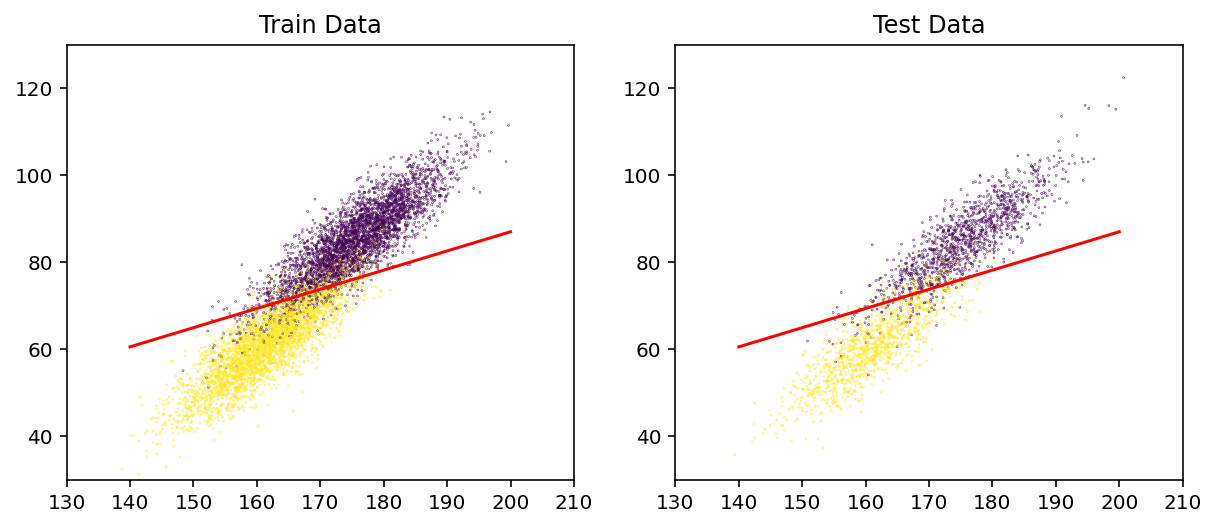

In [11]:
a1, a2 = model.coef_[0][0], model.coef_[0][1]
b = model.intercept_

plt.figure(figsize=(10,4))

xs = np.linspace(140,200,2)
ys = -(a1/a2)*xs - b/a2

plt.subplot(1,2,1)  
plt.title('Train Data')
plt.plot(xs,ys, c='r')
plt.scatter(X_train.Height,X_train.Weight, c=y_train, s=0.05)
plt.ylim([30,130])
plt.xlim([130,210])

plt.subplot(1,2,2)  
plt.title('Test Data')
plt.plot(xs,ys, c='r')
plt.scatter(X_test.Height,X_test.Weight, c=y_test, s=0.05)
plt.ylim([30,130])
plt.xlim([130,210])

## 회귀

In [12]:
X = df[["Gender", "Height"]]
y = df.Weight.values

X_train, X_test, y_train, y_test = train_test_split(X, y)

### 선형 회귀

In [13]:
model = LinearRegression() 
model.fit(X_train, y_train)
model.score(X_test, y_test)

0.901481896307766

### SVM 회귀

In [14]:
model = SVR(kernel="linear")
model.fit(X_train, y_train)
model.score(X_test, y_test)

0.9014260761625111